In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

file_path = 'bank-data/bank-data/bank-additional-full.csv'

In [3]:
data = pd.read_csv(file_path,sep = ';')
columns = data.columns
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
y = data['y'].values
numerical_variables = list(data._get_numeric_data().columns)
categorical_variables = set(data.columns) - set(numerical_variables) 

In [5]:
len(numerical_variables)

10

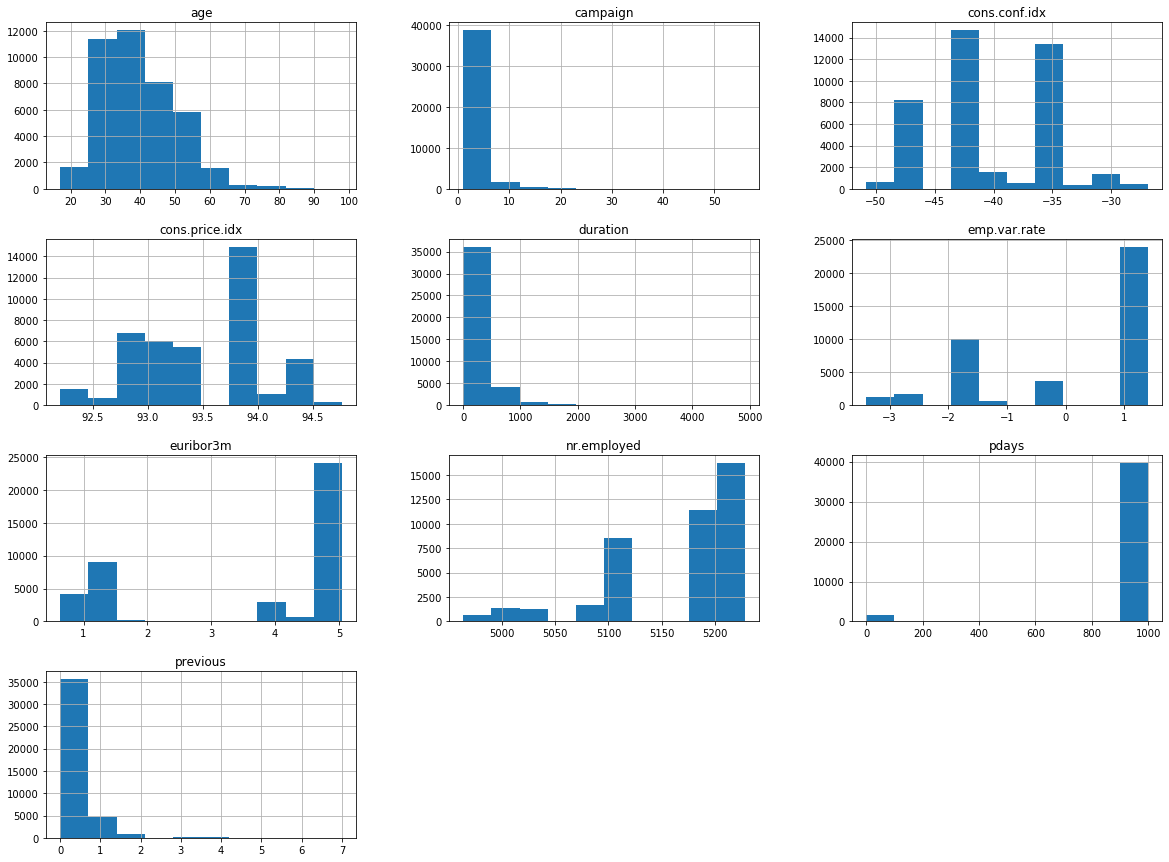

In [6]:
data.hist(figsize = (20,15))
plt.show()

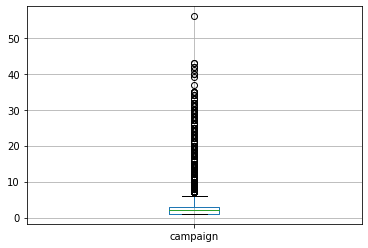

In [7]:
data.boxplot('campaign')

In [13]:
categorical_variables

{'contact',
 'day_of_week',
 'default',
 'education',
 'housing',
 'job',
 'loan',
 'marital',
 'month',
 'poutcome',
 'y'}

In [14]:
from sklearn.preprocessing import LabelEncoder
cat_data = data[categorical_variables]

In [15]:
cat_data

,housing,contact,job,default,marital,education,y,month,day_of_week,loan,poutcome
0,no,telephone,housemaid,no,married,basic.4y,no,may,mon,no,nonexistent
1,no,telephone,services,unknown,married,high.school,no,may,mon,no,nonexistent
2,yes,telephone,services,no,married,high.school,no,may,mon,no,nonexistent
3,no,telephone,admin.,no,married,basic.6y,no,may,mon,no,nonexistent
4,no,telephone,services,no,married,high.school,no,may,mon,yes,nonexistent
...,...,...,...,...,...,...,...,...,...,...,...
41183,yes,cellular,retired,no,married,professional.course,yes,nov,fri,no,nonexistent
41184,no,cellular,blue-collar,no,married,professional.course,no,nov,fri,no,nonexistent
41185,yes,cellular,retired,no,married,university.degree,no,nov,fri,no,nonexistent
41186,no,cellular,technician,no,married,professional.course,yes,nov,fri,no,nonexistent


In [18]:
for var in categorical_variables:
    data[var] = LabelEncoder().fit_transform(data[var].values)

In [21]:
cat_data = data[categorical_variables]
cat_data

,housing,contact,job,default,marital,education,y,month,day_of_week,loan,poutcome
0,0,1,3,0,1,0,0,6,1,0,1
1,0,1,7,1,1,3,0,6,1,0,1
2,2,1,7,0,1,3,0,6,1,0,1
3,0,1,0,0,1,1,0,6,1,0,1
4,0,1,7,0,1,3,0,6,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...
41183,2,0,5,0,1,5,1,7,0,0,1
41184,0,0,1,0,1,5,0,7,0,0,1
41185,2,0,5,0,1,6,0,7,0,0,1
41186,0,0,9,0,1,5,1,7,0,0,1


In [22]:
y = cat_data['y'].values
x = cat_data.drop('y',axis=1)

In [79]:
from sklearn.feature_selection import chi2,f_classif, mutual_info_classif
chi_scores = chi2(x,y)
chi_scores

(array([  4.97873433, 547.95830939,  90.17553267, 321.9229031 ,
         27.79559829, 167.607283  ,   1.92728404,  10.23144457,
          1.58700428,  98.23117432]),
 array([2.56607498e-002, 3.50059831e-121, 2.17940641e-021, 5.52147578e-072,
        1.34832527e-007, 2.46479591e-038, 1.65055891e-001, 1.38066489e-003,
        2.07754662e-001, 3.72282835e-023]))

In [25]:
p_values = pd.Series(chi_scores[1],index = x.columns)
p_values.sort_values(ascending = False , inplace = True)

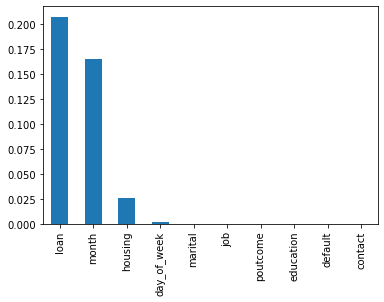

In [28]:
p_values.plot(kind = 'bar')

In [33]:
from sklearn.preprocessing import MinMaxScaler
data[numerical_variables] = MinMaxScaler().fit_transform(data[numerical_variables])
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.481481,3,1,0,0,0,0,1,6,1,...,0.000000,1.0,0.000000,1,0.937500,0.698753,0.60251,0.957379,0.859735,0
1,0.493827,7,1,3,1,0,0,1,6,1,...,0.000000,1.0,0.000000,1,0.937500,0.698753,0.60251,0.957379,0.859735,0
2,0.246914,7,1,3,0,2,0,1,6,1,...,0.000000,1.0,0.000000,1,0.937500,0.698753,0.60251,0.957379,0.859735,0
3,0.283951,0,1,1,0,0,0,1,6,1,...,0.000000,1.0,0.000000,1,0.937500,0.698753,0.60251,0.957379,0.859735,0
4,0.481481,7,1,3,0,0,2,1,6,1,...,0.000000,1.0,0.000000,1,0.937500,0.698753,0.60251,0.957379,0.859735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.691358,5,1,5,0,2,0,0,7,0,...,0.000000,1.0,0.000000,1,0.479167,1.000000,0.00000,0.089322,0.000000,1
41184,0.358025,1,1,5,0,0,0,0,7,0,...,0.000000,1.0,0.000000,1,0.479167,1.000000,0.00000,0.089322,0.000000,0
41185,0.481481,5,1,6,0,2,0,0,7,0,...,0.018182,1.0,0.000000,1,0.479167,1.000000,0.00000,0.089322,0.000000,0
41186,0.333333,9,1,5,0,0,0,0,7,0,...,0.000000,1.0,0.000000,1,0.479167,1.000000,0.00000,0.089322,0.000000,1


In [34]:
y = data['y'].values
X = data.drop('y',axis=1)
chi_scores = chi2(X,y)
chi_scores

(array([  2.21638815,  90.17553267,  27.79559829, 167.607283  ,
        321.9229031 ,   4.97873433,   1.58700428, 547.95830939,
          1.92728404,  10.23144457, 358.01812294,  16.14012868,
        157.9837531 , 441.45320372,  98.23117432, 541.30406749,
         72.58547027,  10.79578477, 890.68553596, 502.65517729]),
 array([1.36552188e-001, 2.17940641e-021, 1.34832527e-007, 2.46479591e-038,
        5.52147578e-072, 2.56607498e-002, 2.07754662e-001, 3.50059831e-121,
        1.65055891e-001, 1.38066489e-003, 7.60563103e-080, 5.88243500e-005,
        3.12026131e-036, 5.22605834e-098, 3.72282835e-023, 9.81151348e-120,
        1.59952375e-017, 1.01731477e-003, 1.03916602e-195, 2.51339264e-111]))

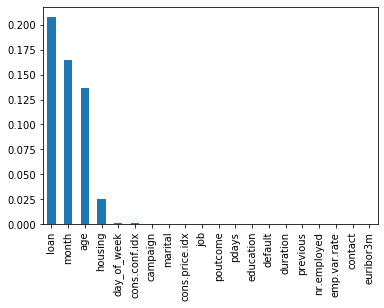

In [36]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot(kind = 'bar')

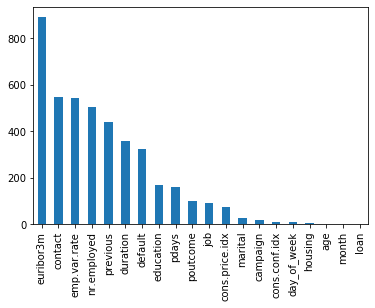

In [52]:
c = pd.Series(chi_scores[0],index = X.columns)
c.sort_values(ascending = False , inplace = True)
c.plot(kind = 'bar')

In [82]:
from sklearn.feature_selection import VarianceThreshold,SelectKBest, SelectPercentile
sel_variance_threshold = VarianceThreshold(0.01) 
X_train_remove_variance = sel_variance_threshold.fit_transform(X)
X_train_remove_variance.shape

(41188, 17)

In [68]:
set(X.columns) - set(X.columns[sel_variance_threshold.get_support()])

{'campaign', 'duration', 'previous'}

In [87]:
sel_chi2 = SelectPercentile(chi2,50)    # select 4 features
X_train_chi2 = sel_chi2.fit_transform(X, y)
set(X.columns) - set(X.columns[sel_chi2.get_support()])

{'age',
 'campaign',
 'cons.conf.idx',
 'cons.price.idx',
 'day_of_week',
 'housing',
 'job',
 'loan',
 'marital',
 'month'}

In [16]:
describtion = data.describe()

In [21]:
data['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [22]:
data[data['y']=='yes']['contact'].value_counts()

cellular     3853
telephone     787
Name: contact, dtype: int64

In [24]:
787/(3853+787)

0.16961206896551725

In [25]:
15044/(26144+15044)

0.3652520151500437

In [10]:
def pdays_map(x):
    if x==999:
        return 0
    elif 0<=x<=5:
        return 4
    elif 6<=x<=10:
        return 3
    elif 11<=x<=15:
        return 2
    else:
        return 1
    
data['pdays'].apply(pdays_map).value_counts()
    

0    39673
4      705
3      606
2      166
1       38
Name: pdays, dtype: int64

In [12]:
data[data['y']=='yes']['marital'].value_counts()

married     2532
single      1620
divorced     476
unknown       12
Name: marital, dtype: int64

In [13]:
data['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [19]:
476/(2532+1620+476+12)

0.10258620689655172

In [20]:
4612/(24928+11568+4612+80)

0.11197436146450422

In [17]:
describtion

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [33]:
def outliers_index(x):
    q1,q3 = describtion[x]['25%'],describtion[x]['75%']
    IQR = q3 - q1
    a = q1 - (4.5*IQR)
    b = q3 + (4.5*IQR)
    print (a,b)
    d = data[(data[x] < a) | (data[x] > b)]
    print (d)
    return d.index
idxs = outliers_index('campaign')
len(idxs)

-8.0 12.0
       age            job   marital          education  default  housing  \
2554    31         admin.   married        high.school  unknown      yes   
2631    48     technician    single            unknown       no  unknown   
2981    48       services   married        high.school       no       no   
3219    39    blue-collar   married           basic.9y       no       no   
3244    30     management    single  university.degree       no  unknown   
...    ...            ...       ...                ...      ...      ...   
35441   36         admin.   married        high.school  unknown       no   
35525   38     technician    single  university.degree       no      yes   
36884   56  self-employed   married  university.degree       no      yes   
37893   52         admin.   married            unknown       no       no   
40529   72        retired  divorced  university.degree       no       no   

          loan    contact month day_of_week  ...  campaign  pdays  previous  

567

In [34]:
from collections import Counter
Counter(data['y'][idxs].values)

Counter({'no': 555, 'yes': 12})

In [9]:
data['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

In [6]:
data.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


In [7]:
correlated_features = ['nr.employed','emp.var.rate','euribor3m']
numerical_features = list(set(numerical_variables) - set(['duration','pdays','campaign']))


numerical_features

['age',
 'emp.var.rate',
 'previous',
 'cons.price.idx',
 'euribor3m',
 'nr.employed',
 'cons.conf.idx']

In [8]:
categorical_variables

{'contact',
 'day_of_week',
 'default',
 'education',
 'housing',
 'job',
 'loan',
 'marital',
 'month',
 'poutcome',
 'y'}

In [9]:
def visualize_categorical(x,y='y',df = data):
    a = dict(df[[x,y]].groupby(y)[x].value_counts())
    print (a)
    fw = list(df[x].value_counts().keys())
    i = np.arange(len(fw))
    width = 0.2
    
    v1 = [a.get(('yes',i),0) for i in fw]
    v2 = [a.get(('no',i),0) for i in fw]
    
    
    plt.bar(i,v1,width,label='1')
    plt.bar(i+width,v2,width,label='2')
    plt.xticks(i + width/2, labels = fw)
    plt.xlabel('Variable type')
    plt.ylabel('Number of instances')
    plt.title('Comparison of target value instances with {}'.format(x))
    plt.legend(['yes','no'])

{('no', 'admin.'): 9070, ('no', 'blue-collar'): 8616, ('no', 'technician'): 6013, ('no', 'services'): 3646, ('no', 'management'): 2596, ('no', 'entrepreneur'): 1332, ('no', 'retired'): 1286, ('no', 'self-employed'): 1272, ('no', 'housemaid'): 954, ('no', 'unemployed'): 870, ('no', 'student'): 600, ('no', 'unknown'): 293, ('yes', 'admin.'): 1352, ('yes', 'technician'): 730, ('yes', 'blue-collar'): 638, ('yes', 'retired'): 434, ('yes', 'management'): 328, ('yes', 'services'): 323, ('yes', 'student'): 275, ('yes', 'self-employed'): 149, ('yes', 'unemployed'): 144, ('yes', 'entrepreneur'): 124, ('yes', 'housemaid'): 106, ('yes', 'unknown'): 37}


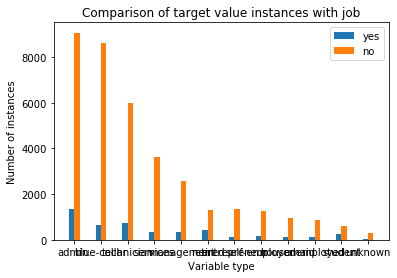

In [10]:
visualize_categorical('job')

{('no', 'cellular'): 22291, ('no', 'telephone'): 14257, ('yes', 'cellular'): 3853, ('yes', 'telephone'): 787}


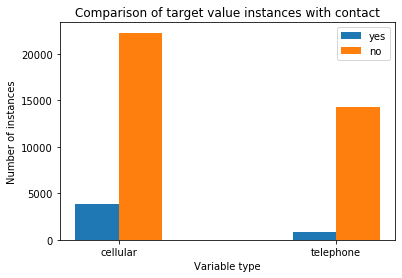

In [11]:
visualize_categorical('contact')

{('no', 'mon'): 7667, ('no', 'thu'): 7578, ('no', 'wed'): 7185, ('no', 'tue'): 7137, ('no', 'fri'): 6981, ('yes', 'thu'): 1045, ('yes', 'tue'): 953, ('yes', 'wed'): 949, ('yes', 'mon'): 847, ('yes', 'fri'): 846}


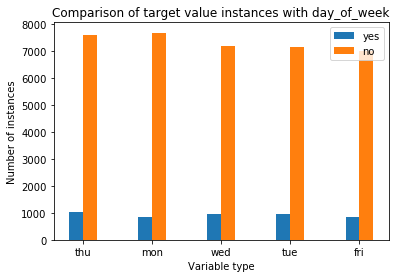

In [12]:
visualize_categorical('day_of_week')

{('no', 'no'): 28391, ('no', 'unknown'): 8154, ('no', 'yes'): 3, ('yes', 'no'): 4197, ('yes', 'unknown'): 443}


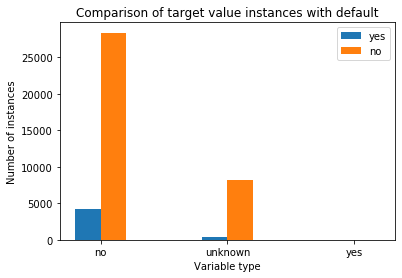

In [13]:
visualize_categorical('default')

In [14]:
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [15]:
36548/len(data)

0.8873458288821987

{('no', 'university.degree'): 10498, ('no', 'high.school'): 8484, ('no', 'basic.9y'): 5572, ('no', 'professional.course'): 4648, ('no', 'basic.4y'): 3748, ('no', 'basic.6y'): 2104, ('no', 'unknown'): 1480, ('no', 'illiterate'): 14, ('yes', 'university.degree'): 1670, ('yes', 'high.school'): 1031, ('yes', 'professional.course'): 595, ('yes', 'basic.9y'): 473, ('yes', 'basic.4y'): 428, ('yes', 'unknown'): 251, ('yes', 'basic.6y'): 188, ('yes', 'illiterate'): 4}


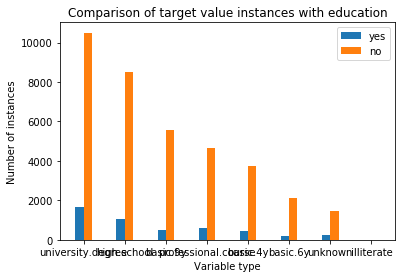

In [16]:
visualize_categorical('education')

{('no', 'yes'): 19069, ('no', 'no'): 16596, ('no', 'unknown'): 883, ('yes', 'yes'): 2507, ('yes', 'no'): 2026, ('yes', 'unknown'): 107}


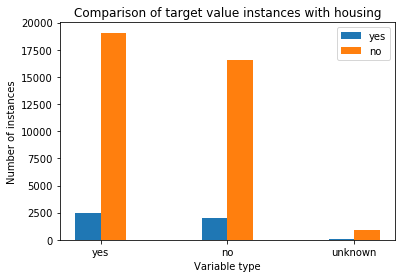

In [17]:
visualize_categorical('housing')

{('no', 'no'): 30100, ('no', 'yes'): 5565, ('no', 'unknown'): 883, ('yes', 'no'): 3850, ('yes', 'yes'): 683, ('yes', 'unknown'): 107}


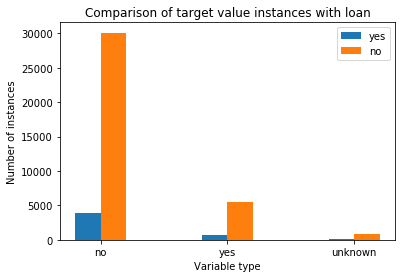

In [18]:
visualize_categorical('loan')

{('no', 'married'): 22396, ('no', 'single'): 9948, ('no', 'divorced'): 4136, ('no', 'unknown'): 68, ('yes', 'married'): 2532, ('yes', 'single'): 1620, ('yes', 'divorced'): 476, ('yes', 'unknown'): 12}


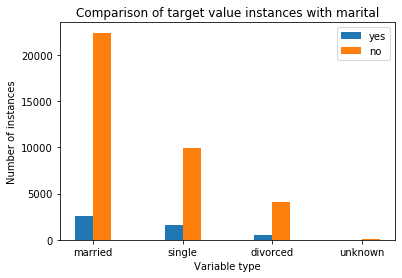

In [19]:
visualize_categorical('marital')

{('no', 'nonexistent'): 32422, ('no', 'failure'): 3647, ('no', 'success'): 479, ('yes', 'nonexistent'): 3141, ('yes', 'success'): 894, ('yes', 'failure'): 605}


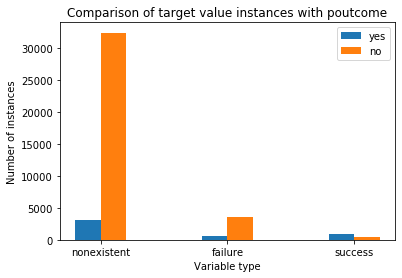

In [20]:
visualize_categorical('poutcome')

In [21]:
data['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [22]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [23]:
from sklearn.preprocessing import LabelEncoder

encoders = {}
encoders_inv = {}

In [24]:
for col in categorical_variables:
    #print (col)
    encoder = LabelEncoder()
    t = encoder.fit_transform(data[col].values)
    mapping = dict(zip(encoder.classes_,encoder.transform(encoder.classes_)))
    inv_mapping = dict(zip(encoder.transform(encoder.classes_),encoder.classes_))
    #print (mapping)
    #print (inv_mapping)
    encoders[col] = mapping
    encoders_inv = inv_mapping
    data[col] = t

In [26]:
features = numerical_features + list(categorical_variables)
X = data[features].drop('y',axis = 1)
y = data['y'].values

In [27]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
X = scalar.fit_transform(X)

In [28]:
X

array([[0.48148148, 0.9375    , 0.        , ..., 0.        , 1.        ,
        0.27272727],
       [0.49382716, 0.9375    , 0.        , ..., 0.42857143, 1.        ,
        0.63636364],
       [0.24691358, 0.9375    , 0.        , ..., 0.42857143, 1.        ,
        0.63636364],
       ...,
       [0.48148148, 0.47916667, 0.        , ..., 0.85714286, 0.        ,
        0.45454545],
       [0.33333333, 0.47916667, 0.        , ..., 0.71428571, 0.        ,
        0.81818182],
       [0.7037037 , 0.47916667, 0.14285714, ..., 0.71428571, 0.        ,
        0.45454545]])

In [29]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits = 10,shuffle = True)
kf.get_n_splits(X,y)
print (kf)

StratifiedKFold(n_splits=10, random_state=None, shuffle=True)


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC

In [ ]:
avg = 0
for train_index, test_index in kf.split(X,y):
    x_train, x_test = X[train_index] , X[test_index]
    y_train, y_test = y[train_index] , y[test_index]
    
    clf = SVC(kernel='poly',C=1)
    clf.fit(x_train, y_train)
    score = clf.score(x_test,y_test)
    avg = avg + score
    print (score)
    
avg = avg/10
print ('Average accuracy = %f%%' %(avg * 100))
    